# Trees Ensemble


In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
#Random_state must be constant
#Control the randomness during data splitting and 
#ensure that every time you run this code youwell get the same split

Random_state = 55 


## Data 

In [6]:
df = pd.read_csv("heart.csv")

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Encoding catigorical columns using pd.get_dummies

In [8]:
cat_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

In [9]:
df = pd.get_dummies(data = df, prefix=cat_columns, columns=cat_columns)

In [10]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [11]:
df.shape

(918, 21)

In [12]:
features = df.drop(columns="HeartDisease")

In [13]:
features.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [14]:
features.shape

(918, 20)

In [15]:
features.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

## Spliting data to trainning data and test data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, df["HeartDisease"], train_size=.8, random_state=Random_state)

In [17]:
X_train.shape

(734, 20)

In [18]:
X_test.shape

(184, 20)

# Building models 

## 1-  Decision Tree

### Note
min_samples_split threeshold <br>
Ex: if min_samples_split is set to 5, then a node in the decision tree will only be split into child nodes if it has at least 5 samples in it. If the number of samples in a node is less than this threshold, the node will not be split further, and it will become a leaf node (decision output).

# First find best min_samples_splits and max_depth

In [19]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] # quantity of samples,
max_depth_list         = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

#### Lets see how the performance of the decision tree model changes with different values of <min_samples_split>

In [20]:
train_accuracy_list = []
test_accuracy_list  = []

for min_samples_split in min_samples_split_list:
    #Train model
    model = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=Random_state)
    model.fit(X_train, y_train)
    
    #predictions 
    training_prediction = model.predict(X_train)
    testing_prediction  = model.predict(X_test)
    
    #Accuracy
    training_accuracy = accuracy_score(training_prediction, y_train)
    testing_accuracy  = accuracy_score(testing_prediction, y_test)
    
    #Append 
    train_accuracy_list.append(training_accuracy)
    test_accuracy_list.append(testing_accuracy)
    


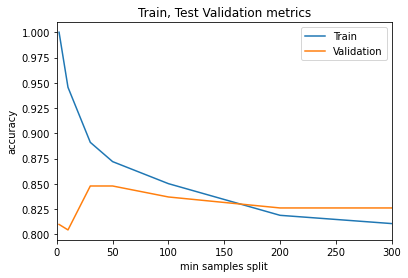

In [21]:
plt.title("Train, Test Validation metrics")
plt.xlabel("min samples split")
plt.ylabel("accuracy")
plt.xlim(0, 300)
plt.plot(min_samples_split_list, train_accuracy_list)
plt.plot(min_samples_split_list, test_accuracy_list)
plt.legend(['Train','Validation'])

It is about best from 30 t0 50

#### Lets see how the performance of the decision tree model changes with different values of <min_samples_split>

In [22]:
train_accuracy_list = []
test_accuracy_list  = []

for max_depth in max_depth_list:
    #Train model
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=Random_state)
    model.fit(X_train, y_train)
    
    #predictions 
    training_prediction = model.predict(X_train)
    testing_prediction  = model.predict(X_test)
    
    #Accuracy
    training_accuracy = accuracy_score(training_prediction, y_train)
    testing_accuracy  = accuracy_score(testing_prediction, y_test)
    
    #Append 
    train_accuracy_list.append(training_accuracy)
    test_accuracy_list.append(testing_accuracy)
    


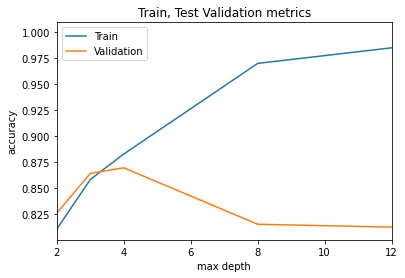

In [23]:
plt.title("Train, Test Validation metrics")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xlim(2, 12)
plt.plot(max_depth_list, train_accuracy_list)
plt.plot(max_depth_list, test_accuracy_list)
plt.legend(['Train','Validation'])

It is about 4 you can try !

So we can now put 
- max_depth = 4 take care that depth start from 0 in DT so this wil be 3 in model training 
- min_sample_split = 50 

## DT Model 

In [24]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=50, max_depth=3, random_state=Random_state).fit(X_train, y_train)

In [25]:
print(f"Training Accuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Testing Accuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4f}")

Training Accuracy score: 0.8583
Testing Accuracy score: 0.8641


## 2- Random Forest 
her we have 3 hyperparameters
- min_samples_split
- max_depth 
- n_estimators -> number of Decision Trees that make up the Random Forest

In [26]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]   
max_depth_list         = [2, 4, 8, 16, 32, 64, None]
n_estimators_list      = [10,50,100,500]

#### min_samples_split

In [29]:
rtraining_accuracy_list =[]
rtesting_accuracy_list  =[]

for min_samples_split in min_samples_split_list:
    # Training model 
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=Random_state)
    model.fit(X_train, y_train)
    
    #predictions 
    training_prediction = model.predict(X_train)
    testing_prediction  = model.predict(X_test)
    
    #Accuracy
    training_accuracy = accuracy_score(training_prediction, y_train)
    testing_accuracy  = accuracy_score(testing_prediction, y_test)
    
    #Append 
    rtraining_accuracy_list.append(training_accuracy)
    rtesting_accuracy_list.append(testing_accuracy)

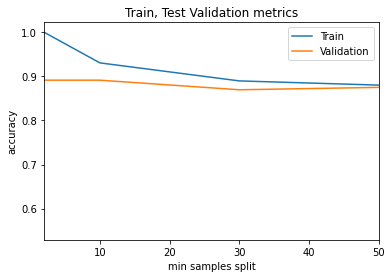

In [36]:
plt.title("Train, Test Validation metrics")
plt.xlabel("min samples split")
plt.ylabel("accuracy")
plt.xlim(2, 50)
plt.plot(min_samples_split_list, rtraining_accuracy_list)
plt.plot(min_samples_split_list, rtesting_accuracy_list)
plt.legend(['Train','Validation'])

Its like from 5 to 10

#### max_depth

In [37]:
rtraining_accuracy_list =[]
rtesting_accuracy_list  =[]

for max_depth in max_depth_list:
    # Training model 
    model = RandomForestClassifier(max_depth=max_depth, random_state=Random_state)
    model.fit(X_train, y_train)
    
    #predictions 
    training_prediction = model.predict(X_train)
    testing_prediction  = model.predict(X_test)
    
    #Accuracy
    training_accuracy = accuracy_score(training_prediction, y_train)
    testing_accuracy  = accuracy_score(testing_prediction, y_test)
    
    #Append 
    rtraining_accuracy_list.append(training_accuracy)
    rtesting_accuracy_list.append(testing_accuracy)

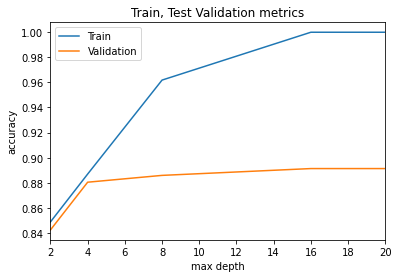

In [40]:
plt.title("Train, Test Validation metrics")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.xlim(2, 20)
plt.plot(max_depth_list, rtraining_accuracy_list)
plt.plot(max_depth_list, rtesting_accuracy_list)
plt.legend(['Train','Validation'])

### n_estimators

In [42]:
rtraining_accuracy_list =[]
rtesting_accuracy_list  =[]

for n_estimators in n_estimators_list:
    # Training model 
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=Random_state)
    model.fit(X_train, y_train)
    
    #predictions 
    training_prediction = model.predict(X_train)
    testing_prediction  = model.predict(X_test)
    
    #Accuracy
    training_accuracy = accuracy_score(training_prediction, y_train)
    testing_accuracy  = accuracy_score(testing_prediction, y_test)
    
    #Append 
    rtraining_accuracy_list.append(training_accuracy)
    rtesting_accuracy_list.append(testing_accuracy)

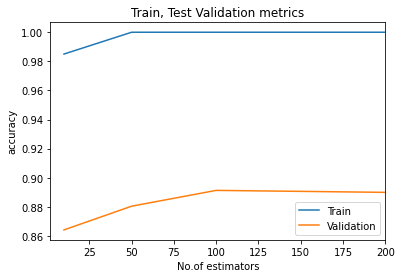

In [43]:
plt.title("Train, Test Validation metrics")
plt.xlabel("No.of estimators")
plt.ylabel("accuracy")
plt.xlim(2, 200)
plt.plot(n_estimators_list, rtraining_accuracy_list)
plt.plot(n_estimators_list, rtesting_accuracy_list)
plt.legend(['Train','Validation'])

SO hyperparameters 
- min_samoles_split = 10
- max_depth = 10
- n_estimators = 100

In [53]:
random_forest_model = RandomForestClassifier(min_samples_split=10, max_depth=10, n_estimators=100, random_state=Random_state)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=55)

In [56]:
print(f"Training Accuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nTesting Accuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Training Accuracy score: 0.9319
Testing Accuracy score: 0.8913


## 3- XGBoost

In [58]:
xgb_model = XGBClassifier(n_estimators=500, learning_rate=.1, verbosity=1, random_state=Random_state)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10)


[0]	validation_0-logloss:0.63451
[1]	validation_0-logloss:0.59095
[2]	validation_0-logloss:0.55279
[3]	validation_0-logloss:0.51590
[4]	validation_0-logloss:0.48913
[5]	validation_0-logloss:0.46744
[6]	validation_0-logloss:0.44373
[7]	validation_0-logloss:0.42828
[8]	validation_0-logloss:0.41506
[9]	validation_0-logloss:0.39946
[10]	validation_0-logloss:0.38666
[11]	validation_0-logloss:0.37622
[12]	validation_0-logloss:0.36495
[13]	validation_0-logloss:0.35678
[14]	validation_0-logloss:0.35008
[15]	validation_0-logloss:0.34255
[16]	validation_0-logloss:0.33616
[17]	validation_0-logloss:0.33280
[18]	validation_0-logloss:0.32697
[19]	validation_0-logloss:0.32219
[20]	validation_0-logloss:0.31993
[21]	validation_0-logloss:0.31900
[22]	validation_0-logloss:0.31770
[23]	validation_0-logloss:0.31399
[24]	validation_0-logloss:0.31462
[25]	validation_0-logloss:0.31491
[26]	validation_0-logloss:0.31112
[27]	validation_0-logloss:0.31083
[28]	validation_0-logloss:0.31014
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=55,
              reg_alpha=0, reg_lambda=1, ...)

In [59]:
xgb_model.best_iteration

35

In [61]:
print(f"Training Accuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nTesting Accuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

Training Accuracy score: 0.9673
Testing Accuracy score: 0.8859
